In [1]:
# Python 3.7
# imports
import matplotlib.font_manager
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import rcParams

In [2]:
# inline plottling and some aesthetics
sns.set_palette("pastel")
rcParams["font.family"] = "sans-serif"

%matplotlib inline

# Make sure you have this notebook stored in the main SNOwGLoBES dir. 

In [3]:
# get chan file used and detector
chan_file = "argon"
detector = "ar40kt"
flux_name = "livermore"

In [4]:
# set parth to channel
path_chan = f"channels/channels_{chan_file}.dat"

In [5]:
# Turn our chan_file into a DataFrame

df_chan = pd.read_csv(path_chan, sep=" ", header=None)

if df_chan[0][0] == "SN_nu":
    df_chan.drop(df_chan.columns[0], axis=1, inplace=True)

In [6]:
# Check structure chan_file dataframe
df_chan

,1,2,3,4,5,6,7,8,9,10,11
0,nue_e,0,+,e,18.0,400,0.0005,0.1,400,0.0005,0.1
1,nuebar_e,0,-,e,18.0,400,0.0005,0.1,400,0.0005,0.1
2,numu_e,0,+,m,18.0,400,0.0005,0.1,400,0.0005,0.1
3,numubar_e,0,-,m,18.0,400,0.0005,0.1,400,0.0005,0.1
4,nutau_e,0,+,t,18.0,400,0.0005,0.1,400,0.0005,0.1
5,nutaubar_e,0,-,t,18.0,400,0.0005,0.1,400,0.0005,0.1
6,nue_Ar40,0,+,e,1.0,400,0.0005,0.1,400,0.0005,0.1
7,nuebar_Ar40,0,-,e,1.0,400,0.0005,0.1,400,0.0005,0.1
8,nc_nue_Ar40,0,+,e,1.0,400,0.0005,0.1,400,0.0005,0.1
9,nc_numu_Ar40,0,+,m,1.0,400,0.0005,0.1,400,0.0005,0.1


In [7]:
# count number of iteractions and columns in chan file
num_interactions = len(df_chan.index)
num_col = len(df_chan.columns)

In [8]:
# Make a dicts for flavor,  binning parameters, Energy interval
i = 0

chan = dict()

in_bin = dict()
in_lo_E = dict()
in_hi_E = dict()
detc_bin = dict()
detc_lo_E = dict()
detc_hi_E = dict()

in_E_interval = dict()
detc_E_interval = dict()

# Go through each interaction in the chan file
while i in range(0, num_interactions):

    # set corresponding binning parameters for custom binning chan file
    if num_col == 11:
        chan[i] = df_chan[1][i]

        in_bin[i] = df_chan[6][i]
        in_lo_E[i] = df_chan[7][i]
        in_hi_E[i] = df_chan[8][i]
        detc_bin[i] = df_chan[9][i]
        detc_lo_E[i] = df_chan[10][i]
        detc_hi_E[i] = df_chan[11][i]

        in_E_interval[i] = np.linspace(in_lo_E[i], in_hi_E[i], in_bin[i])
        detc_E_interval[i] = np.linspace(detc_lo_E[i], detc_hi_E[i], detc_bin[i])

    # Use OG binning parameters
    else:
        chan[i] = df_chan[0][i]

        in_bin[i] = 200
        in_lo_E[i] = 0.005
        in_hi_E[i] = 0.1
        detc_bin[i] = 200
        detc_lo_E[i] = 0.005
        detc_hi_E[i] = 0.1

        in_E_interval[i] = np.linspace(in_lo_E[i], in_hi_E[i], in_bin[i])
        detc_E_interval[i] = np.linspace(detc_lo_E[i], detc_hi_E[i], detc_bin[i])

    # increment by 1
    i += 1

In [9]:
# # This method takes  in the nu flavor and transforms the string into  LaTEX


# def fancy_name(name):
#     nu_name = {
#         "nue": r"\nu_e",
#         "numu": r"\nu_\mu",
#         "nutau": r"\nu_\tau",
#         "nuebar": r"\bar{\nu}_e",
#         "numubar": r"\bar{\nu}_\mu",
#         "nutaubar": r"\bar{\nu}_\tau",
#     }

#     name_spl = name.split("_")
#     # raw (r) formated strings
#     if name_spl[0] == "nc":
#         return r"${{{}}} \; {{{}}}$".format(name_spl[0].upper(), nu_name[name_spl[1]])
#     elif name_spl[1] == "e":
#         return r"${{{}}}-e^- \; ES$".format(nu_name[name_spl[0]])
#     if name_spl[0] == "coh":
#         return r"Coherent Scattering ${{{}}} \; {{{}}}$".format(
#             name_spl[2], nu_name[name_spl[4]]
#         )
#     else:
#         return r"${{{}}} -{{{}}} \; CC$".format(nu_name[name_spl[0]], name_spl[1])

#     # If you don't have LaTEX installed just comment out everything above and return the arg


# #     return name

/home/sebas/.conda/envs/work/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/sebas/.conda/envs/work/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/sebas/.conda/envs/work/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretatio

Text(0, 0.5, 'Count')

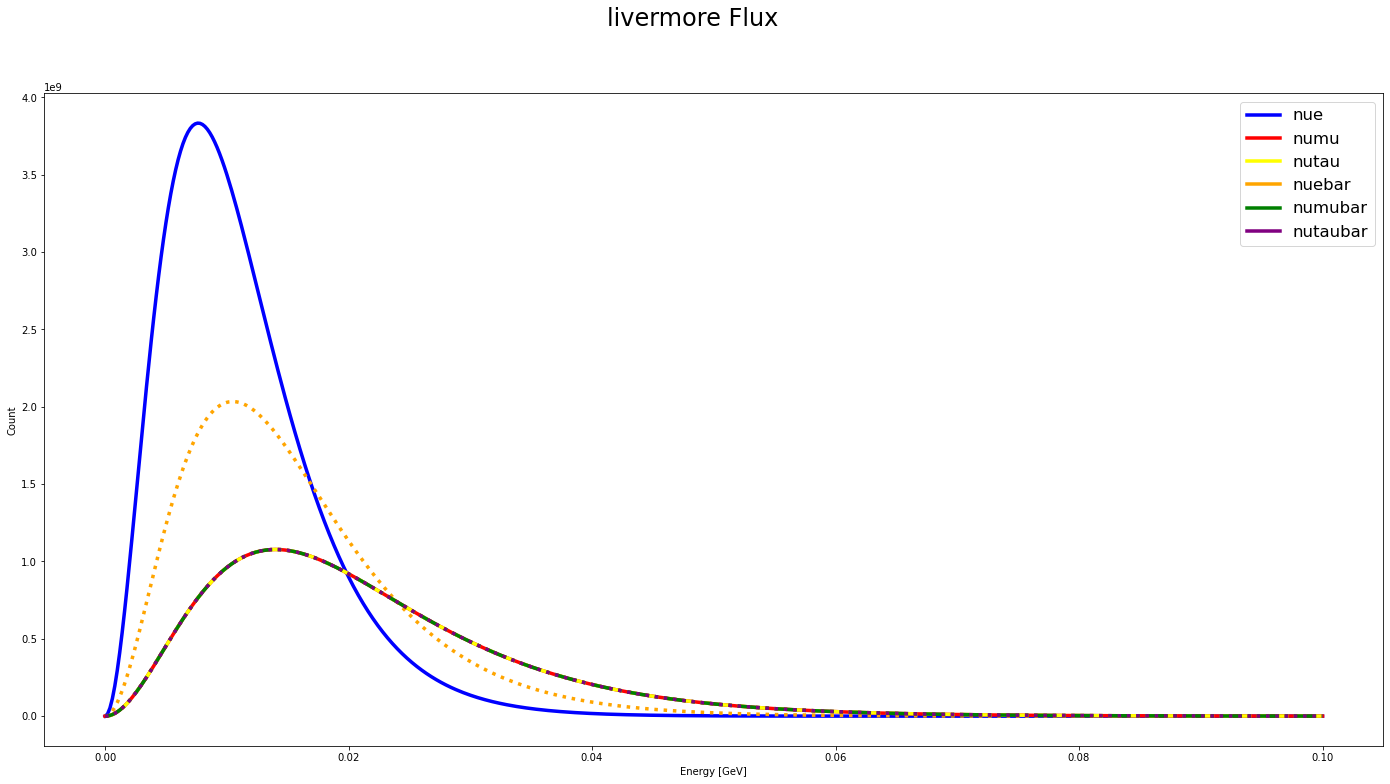

In [10]:
# Plotting Flux
fig_flx, axes = plt.subplots(1, 1, figsize=(24, 12))

fig_flx.suptitle(f"{flux_name} Flux", fontsize=24)
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 3.5})

df_flx = pd.read_csv(
    f"fluxes/{flux_name}.dat",
    sep="\s+",
    names=["Energy", "nue", "numu", "nutau", "nuebar", "numubar", "nutaubar",],
)

enrg_interval = np.linspace(0, df_flx["Energy"].max(), len(df_flx.index))

nue_line = sns.lineplot(enrg_interval, df_flx["nue"], color="blue", label="nue")
numu_line = sns.lineplot(enrg_interval, df_flx["numu"], color="red", label="numu")
nutau_line = sns.lineplot(enrg_interval, df_flx["nutau"], color="yellow", label="nutau")
nuebar_line = sns.lineplot(
    enrg_interval, df_flx["nuebar"], color="orange", label="nuebar"
)
numubar_line = sns.lineplot(
    enrg_interval, df_flx["numubar"], color="green", label="numubar"
)
nutaubar_line = sns.lineplot(
    enrg_interval, df_flx["nutaubar"], color="purple", label="nutaubar"
)

axes.lines[1].set_linestyle("-")
axes.lines[2].set_linestyle("--")
axes.lines[3].set_linestyle("dotted")
axes.lines[4].set_linestyle("-.")
axes.lines[5].set_linestyle(":")

axes.set_xlabel("Energy [GeV]")
axes.set_ylabel("Count")

# Plotting Smearing Files

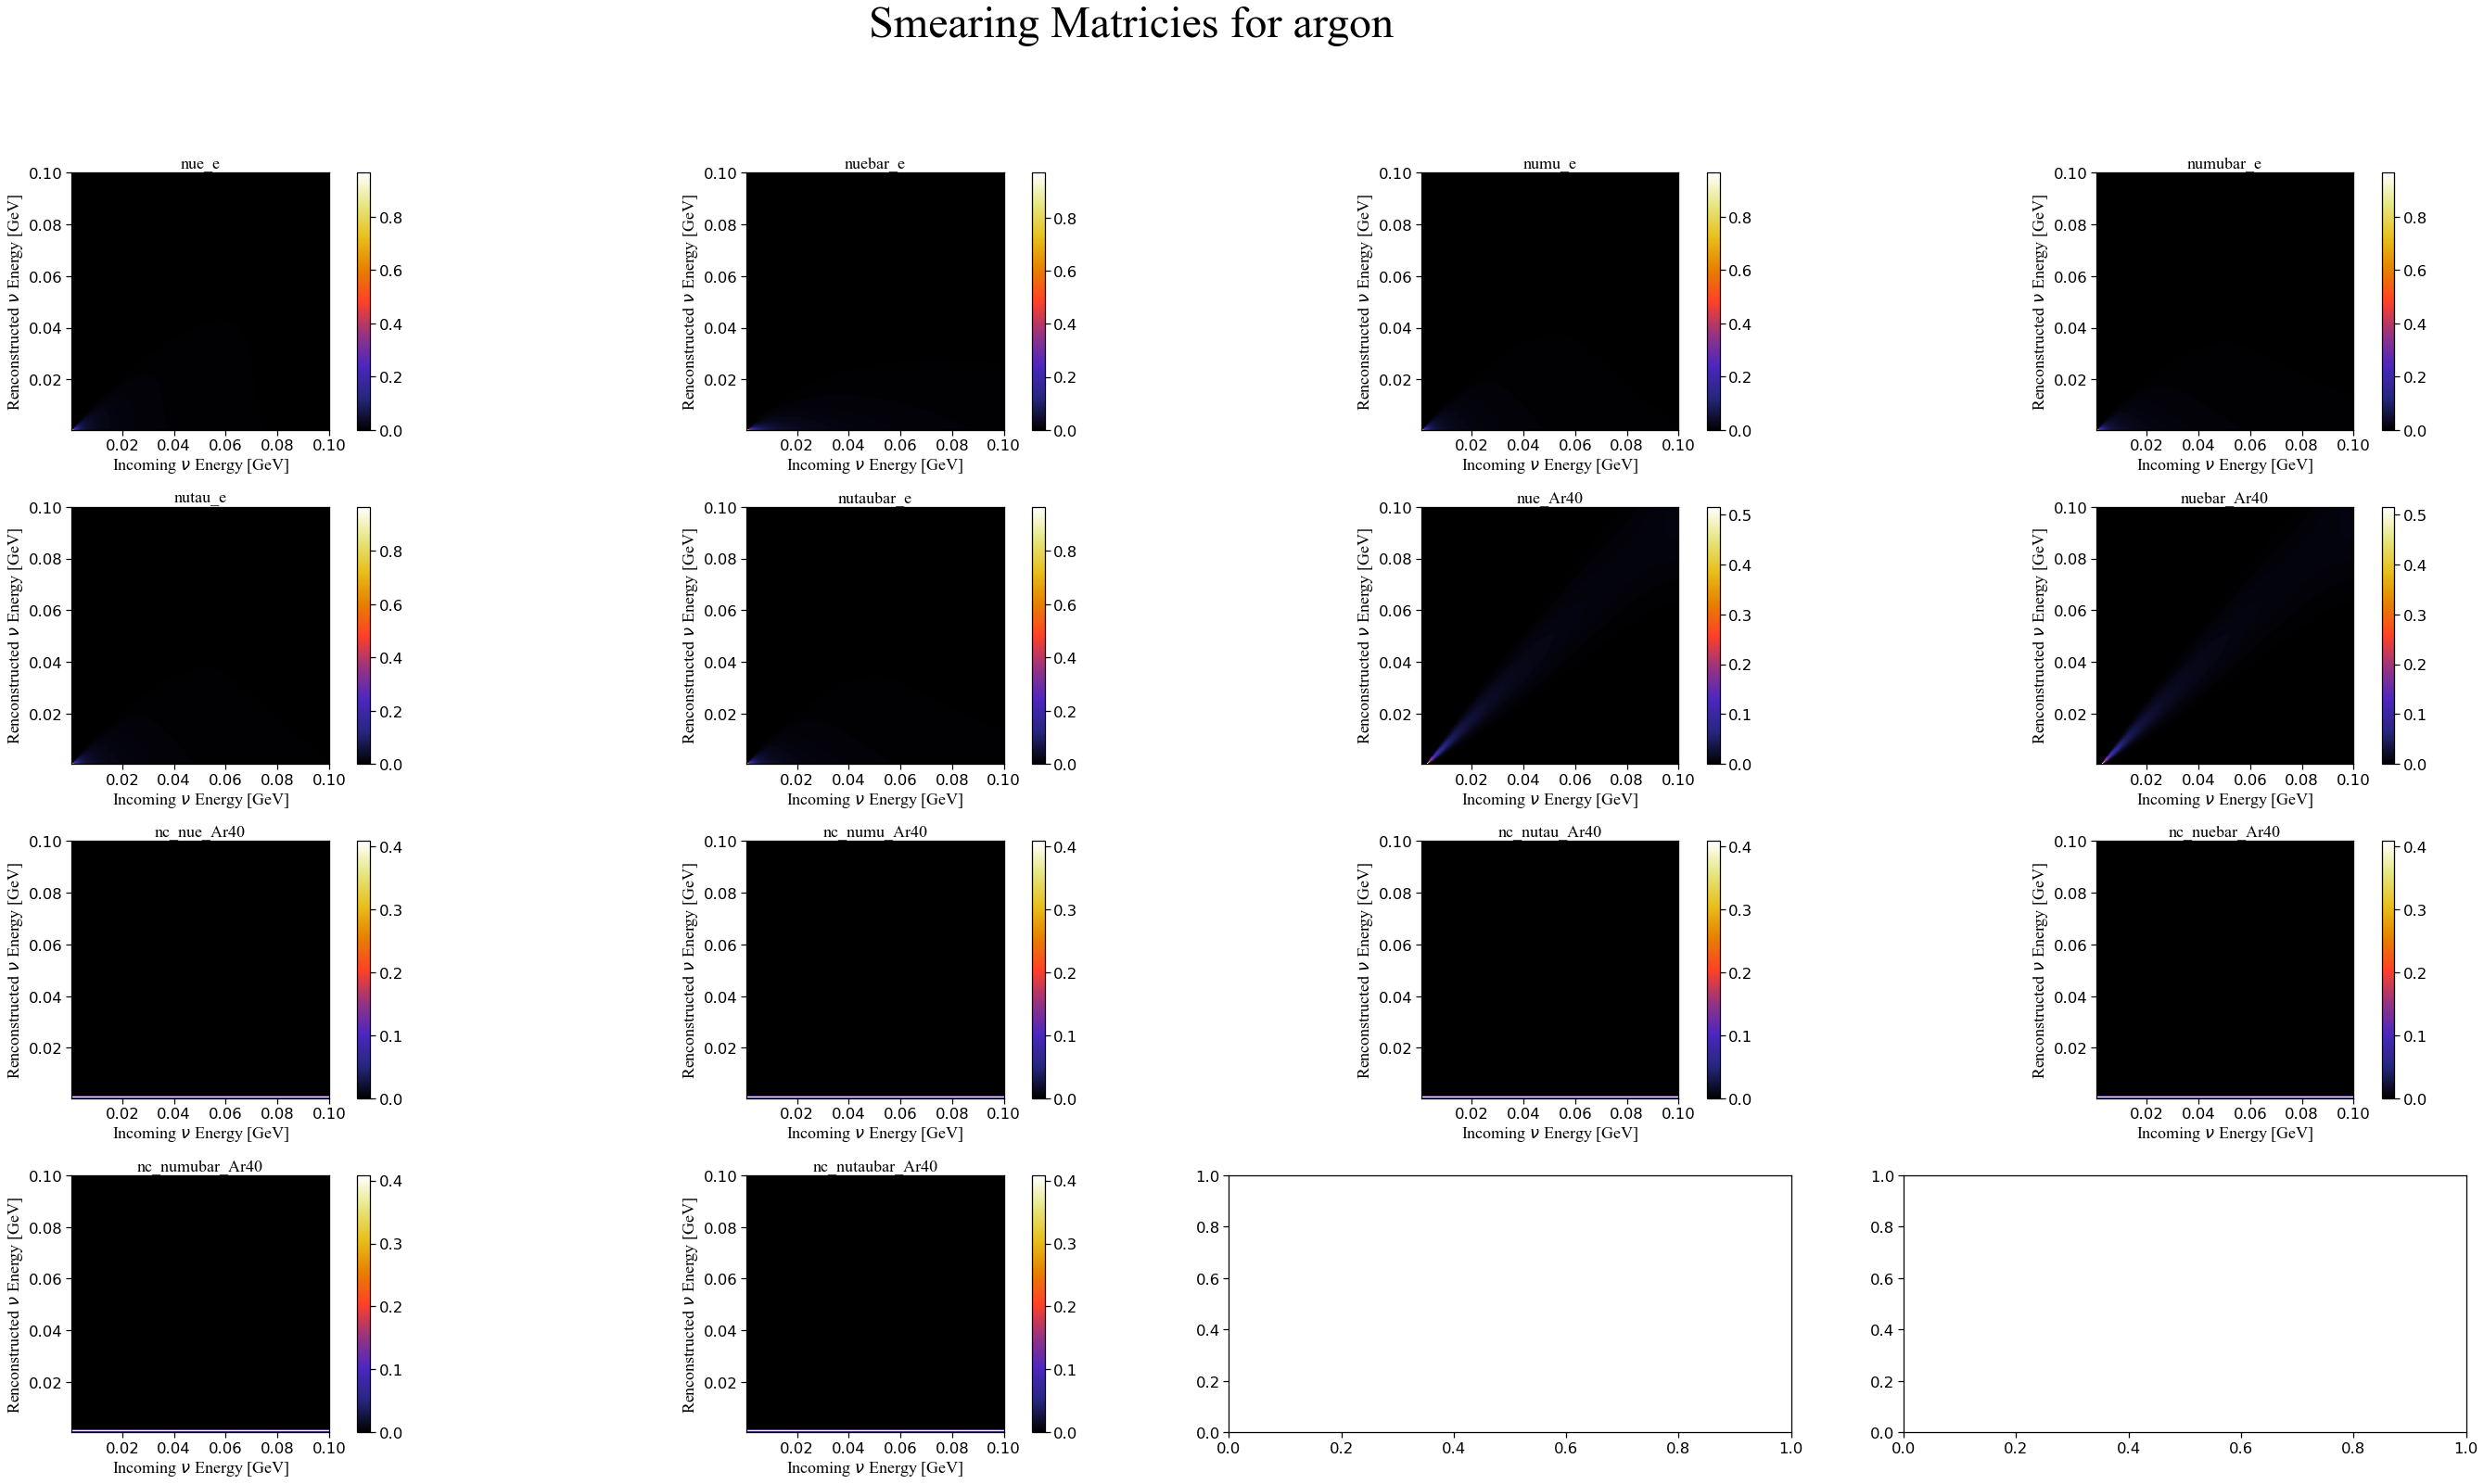

In [44]:
# For plotting I'm going to use 4x4 subplot fig
# This one takes awhile to compile

# in subplots the structure follows row,col
fig_sm, axes = plt.subplots(4, 4, figsize=(50, 25))
# Set title
fig_sm.suptitle(
    f"Smearing Matricies for {chan_file}", fontsize=48, fontname="Times New Roman"
)
#
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 4.5})
# I'm going to make a dict that store the loaction with a corresponding key
# If you are goint to change the number of subplots makes sure you edit loc accordingly
loc = {
    0: axes[0, 0],
    1: axes[0, 1],
    2: axes[0, 2],
    3: axes[0, 3],
    4: axes[1, 0],
    5: axes[1, 1],
    6: axes[1, 2],
    7: axes[1, 3],
    8: axes[2, 0],
    9: axes[2, 1],
    10: axes[2, 2],
    11: axes[2, 3],
    12: axes[3, 0],
    13: axes[3, 1],
    14: axes[3, 2],
    15: axes[3, 3],
}

# This while loop will parse the smear dir for the corresponding smearing matrix
i = 0
for i in range(0, num_interactions):

    # use panda's read_csv to turn the smearing matrix into a df
    # I have all my custom binning smear files stored in the new/ dir

    smear_df = pd.read_csv(
        f"smear/smear_{chan[i]}_{detector}.dat",
        sep="{|}|,|:|;|\+s",
        engine="python",
        skiprows=[0],
        header=None,
    )
    

    # cleaning up unwated rows/cols
    smear_df.drop(columns=[0, 1, 2, in_bin[i] + 3, in_bin[i] + 4], axis=0, inplace=True)
    smear_df.drop(index=in_bin[i], axis=1, inplace=True)
    smear_df.columns = in_E_interval[i]
    smear_df.index = detc_E_interval[i]
    # Make a heatmap using sns and place it in its corresponding row/col
    fig = loc[i].imshow(smear_df,cmap="CMRmap", # nice colormap 
                       interpolation="nearest", # avoid smoothing
                       origin="lower", # (0,0) is in the bottom left corner
                       extent=(in_lo_E[i],in_hi_E[i],detc_lo_E[i],detc_hi_E[i])) # set axis ranges
    plt.colorbar(fig, ax=loc[i])
    # give subplot a title
    loc[i].set_title(chan[i], fontname="Times New Roman")
    # set x and y labels
    loc[i].set_xlabel(
        r"Incoming $\nu$ Energy [GeV]", fontsize=18, fontname="Times New Roman")
    loc[i].set_ylabel(r"Renconstructed $\nu$ Energy [GeV]", fontsize=18, fontname="Times New Roman")
    # incriment
    i += 1

# set spacing
plt.subplots_adjust(hspace=0.3)

# Plotting the outfiles 

In [ ]:
# subplot for all interaction rates (smeared)
# The structure of this cell is the same as the smear plotter

out_kind = {1: "_smeared", 2: "_smeared_unweighted", 3: "_unweighted", 4: ""}

fig_ir, axes = plt.subplots(4, 4, figsize=(48, 24), sharey=False)
fig_ir.suptitle(
    f"Interaction Rates for {chan_file}\n{flux_name} flux on {detector}",
    fontsize=24,
    fontname="Times New Roman",
)
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 3.5})


loc = {
    0: axes[0, 0],
    1: axes[0, 1],
    2: axes[0, 2],
    3: axes[0, 3],
    4: axes[1, 0],
    5: axes[1, 1],
    6: axes[1, 2],
    7: axes[1, 3],
    8: axes[2, 0],
    9: axes[2, 1],
    10: axes[2, 2],
    11: axes[2, 3],
    12: axes[3, 0],
    13: axes[3, 1],
    14: axes[3, 2],
    15: axes[3, 3],
}


i = 0
for i in range(0, num_interactions):

    # use panda's read_csv to turn the outfile into a df

    ir_df = pd.read_csv(
        f"out/{flux_name}_{chan[i]}_{detector}_events{out_kind[4]}.dat",
        sep=" ",
        names=["E_nu", "Dect_Evt"],
        encoding="utf-8",
        skiprows=[in_bin[i], in_bin[i] + 1],
    )

    data_ir = ir_df["Dect_Evt"]
    max_ir = data_ir.max()

    sns.lineplot(in_E_interval[i], data_ir, ax=loc[i])

    loc[i].grid(True, linestyle=":")
    loc[i].set_xlim([0, in_hi_E[i]])
    loc[i].set_ylim([0, max_ir + max_ir * 0.1])

    loc[i].set_xlabel(
        r"Incoming $\nu$ Energy [GeV]", fontsize=18, fontname="Times New Roman"
    )
    loc[i].set_ylabel("Interaction Rate", fontsize=18, fontname="Times New Roman")

    loc[i].set_title(chan[i], fontname="Times New Roman")

    i += 1

plt.subplots_adjust(hspace=0.6)
ir_df.head()

# XSC Plotting

In [ ]:
# xsc plotting, will plot all the xsc (nu flavor dependent)
i = 0
# target = "Ar40"
flavor_split = chan[i].split("_")

fig_xsc, axes = plt.subplots(4, 4, figsize=(48, 24), sharey=False)
fig_xsc.suptitle(
    f"Cross Sections for {chan_file}", fontsize=24, fontname="Times New Roman",
)
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})


loc = {
    0: axes[0, 0],
    1: axes[0, 1],
    2: axes[0, 2],
    3: axes[0, 3],
    4: axes[1, 0],
    5: axes[1, 1],
    6: axes[1, 2],
    7: axes[1, 3],
    8: axes[2, 0],
    9: axes[2, 1],
    10: axes[2, 2],
    11: axes[2, 3],
    12: axes[3, 0],
    13: axes[3, 1],
    14: axes[3, 2],
    15: axes[3, 3],
}


for i in range(0, num_interactions):
    df_xsc = pd.read_csv(
        f"xscns/xs_{chan[i]}.dat",
        sep="\s+",
        skiprows=[0, 1],
        names=[
            "log(energy in GeV)",
            "nue",
            "numu",
            "nutau",
            "nuebar",
            "numubar",
            "nutaubar",
        ],
    )
    if flavor_split[0] == "nc":
        just_flavor = flavor_split[1]

    elif flavor_split[1] == "e":
        just_flavor = flavor_split[0]

    elif flavor_split[0] == "coh":
        just_flavor = flavor_split[3]

    else:
        just_flavor = flavor_split[0]

    df_xsc.head()
    data_xsc = df_xsc[just_flavor]
    max_xs = data_xsc.max()

    sns.lineplot(df_xsc["log(energy in GeV)"], data_xsc, ax=loc[i])

    loc[i].grid(True, linestyle=":")
    loc[i].set_xlim([-3.311, -1.1])
    loc[i].set_ylim([0, max_xs + max_xs * 0.1])

    loc[i].set_xlabel(
        r"Incoming Log Energy [GeV]", fontsize=18, fontname="Times New Roman"
    )
    loc[i].set_ylabel(r"Cross Section", fontsize=18, fontname="Times New Roman")

    loc[i].set_title(chan[i], fontname="Times New Roman")

    i += 1

plt.subplots_adjust(hspace=0.6)

In [ ]:
data_xsc.head()